# Lab 1: Clustering of sequential data in education

Quan Nguyen, Department of Statistics, University of British Columbia

## About the dataset

In this lab, we are going to use the built-in `biofam` data set from the `TraMineR` package. See more details [here](http://traminer.unige.ch/doc/biofam.html)

This data consists information about the Family life states from the Swiss Household Panel biographical survey. 16 year-long family life sequences built from the retrospective biographical survey carried out by the Swiss Household Panel (SHP) in 2002.

A data frame with 2000 rows, 16 state variables, 1 id variable and 7 covariates and 2 weights variables.

The data set contains (in columns 10 to 25) sequences of family life states from age 15 to 30 (sequence length is 16) and a series of covariates. The sequences are a sample of 2000 sequences of those created from the SHP biographical survey. It includes only individuals who were at least 30 years old at the time of the survey. The biofam data set describes family life courses of 2000 individuals born between 1909 and 1972.

The states numbered from 0 to 7 are defined from the combination of five basic states, namely Living with parents (Parent), Left home (Left), Married (Marr), Having Children (Child), Divorced:

0 = "Parent"  
1 = "Left"  
2 = "Married"  
3 = "Left+Marr"  
4 = "Child"  
5 = "Left+Child"  
6 = "Left+Marr+Child"  
7 = "Divorced"  

| Variable | Label                                          |
|----------|------------------------------------------------|
| idhous   | ID                                             |
| sex      | sex                                            |
| birthy   | birth year                                     |
| nat102   | nationality                                    |
| plingu02 | interview language                             |
| p02r01   | confession or religion                         |
| p02r04   | participation in religious services: frequency |
| cspfaj   | Swiss socio-professional category: Fathers job |
| cspmoj   | Swiss socio-professional category: Mothers job |
| a15      | family status at age 15                        |
| ...      |                                                |
| a30      | family status at age 30                        |


In [5]:
library(tidyverse)
library(TraMineR)
data(biofam)
str(biofam)

'data.frame':	2000 obs. of  27 variables:
 $ idhous  : num  66891 28621 57711 17501 147701 ...
 $ sex     : Factor w/ 2 levels "man","woman": 1 1 2 1 1 1 1 1 1 2 ...
 $ birthyr : num  1943 1935 1946 1918 1946 ...
 $ nat_1_02: Factor w/ 200 levels "other error",..: 6 6 6 6 6 6 6 6 6 6 ...
 $ plingu02: Factor w/ 3 levels "french","german",..: 2 2 1 2 2 3 2 1 1 2 ...
 $ p02r01  : Factor w/ 13 levels "other error",..: 6 7 13 7 7 7 6 9 6 7 ...
 $ p02r04  : Factor w/ 14 levels "other error",..: 9 13 7 13 7 6 7 14 9 13 ...
 $ cspfaj  : Factor w/ 12 levels "active occupied but not classified",..: 7 7 7 5 NA 12 NA 11 7 7 ...
 $ cspmoj  : Factor w/ 12 levels "active occupied but not classified",..: 7 NA 9 NA NA NA NA NA 7 NA ...
 $ a15     : num  0 0 0 0 0 0 0 0 0 1 ...
 $ a16     : num  0 1 0 0 0 0 0 0 0 1 ...
 $ a17     : num  0 1 0 0 0 0 0 0 0 1 ...
 $ a18     : num  0 1 0 0 0 0 0 0 0 1 ...
 $ a19     : num  0 1 0 0 0 0 0 0 0 1 ...
 $ a20     : num  0 1 0 1 1 0 0 0 0 1 ...
 $ a21     : num  0

## Part 1: Data manipulation

### Q1: Import the following dataset and create a sequence object using the `seqdef()` function in the `TraMineR` package.

Hint: You can use the option `states` in `seqdef()` to assign the short state labels for each state

In [10]:
# state labels
bfstates <- c("Parent", "Left", "Married", "Left+Marr", "Child", "Left+Child", "Left+Marr+Child", "Divorced")

# BEGIN SOLUTION
biofam.seq <- seqdef(biofam, 10:25, states = bfstates, labels = bfstates)
# END SOLUTION

 [>] state coding:

       [alphabet]  [label]         [long label] 

     1  0           Parent          Parent

     2  1           Left            Left

     3  2           Married         Married

     4  3           Left+Marr       Left+Marr

     5  4           Child           Child

     6  5           Left+Child      Left+Child

     7  6           Left+Marr+Child Left+Marr+Child

     8  7           Divorced        Divorced

 [>] 2000 sequences in the data set

 [>] min/max sequence length: 16/16



### Q2: Convert the sequence object from 'STS' to 'SPS' format using the `seqformat()` function

In [13]:
# BEGIN SOLUTION
seqformat(biofam.seq, from ='STS', to='SPS')
# END SOLUTION

 [!!] 'missing' set as "c('*','%')", the 'nr' and 'void' code from the 'data' state sequence object

 [>] converting STS sequences to 2000 SPS sequences



,[1],[2],[3],[4],[5],[6],[7],[8],[9],[10],[11],[12],[13],[14],[15],[16]
1167,"(Parent,9)","(Left+Marr,1)","(Left+Marr+Child,6)",NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
514,"(Parent,1)","(Left,10)","(Left+Marr,1)","(Left+Marr+Child,4)",NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1013,"(Parent,7)","(Left,5)","(Left+Marr,1)","(Left+Marr+Child,3)",NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
275,"(Parent,5)","(Left,11)",NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2580,"(Parent,5)","(Left,8)","(Left+Marr+Child,3)",NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
773,"(Parent,16)",NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1187,"(Parent,9)","(Married,7)",NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
47,"(Parent,6)","(Left,5)","(Left+Marr,3)","(Left+Marr+Child,2)",NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2091,"(Parent,11)","(Left+Marr+Child,5)",NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1846,"(Left,9)","(Left+Marr+Child,7)",NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


## Part 2: Exploratory data analysis

### Q3 Plot the first 15 sequences

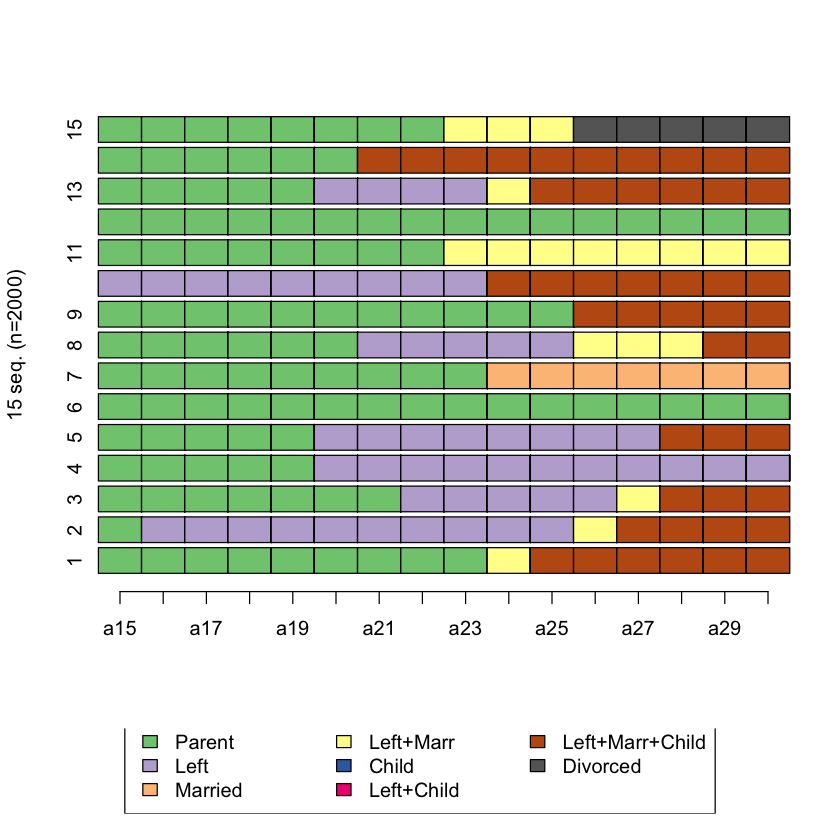

In [18]:
# Hint: seqiplot()

# BEGIN SOLUTION
seqiplot(biofam.seq, , idxs = 1:15)
# END SOLUTION

### Q4 Plot the state distribution

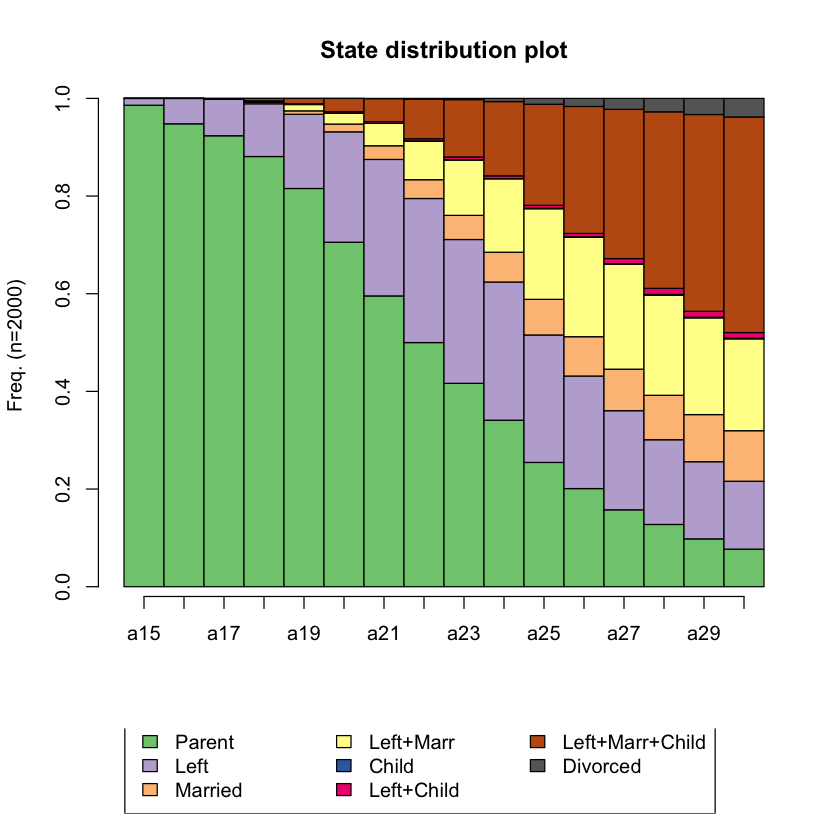

In [19]:
# Hint: seqdplot()

# BEGIN SOLUTION
seqdplot(biofam.seq, main = "State distribution plot")
# END SOLUTION

### Q5 Plot the top 10 most frequent sequences

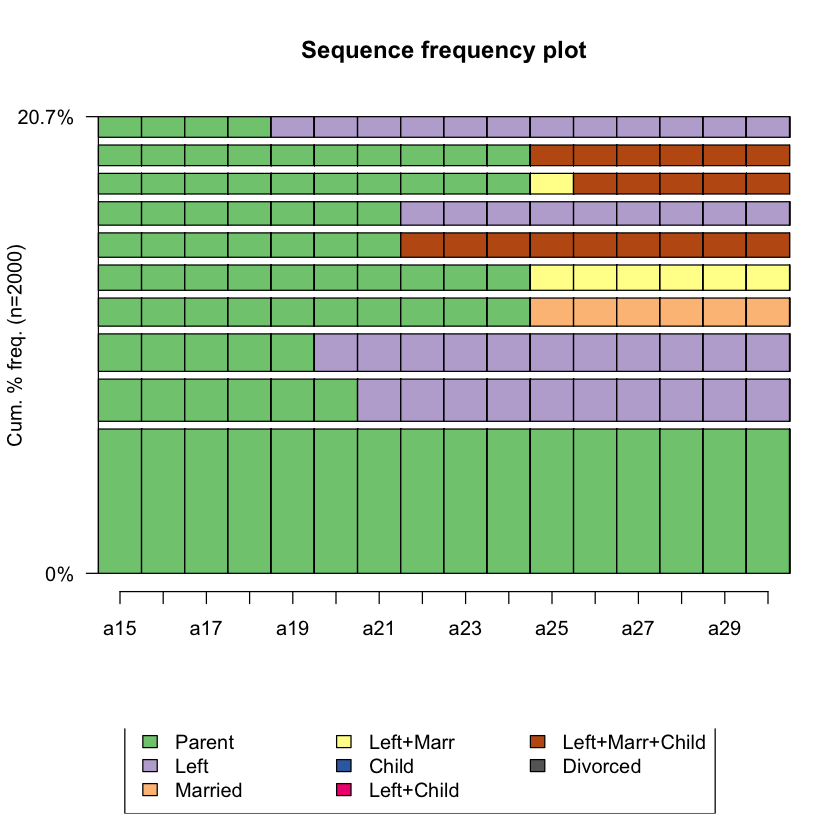

In [20]:
# Hint: seqfplot()

# BEGIN SOLUTION
seqfplot(biofam.seq, main = "Sequence frequency plot", idxs = 1:10)
# END SOLUTION

### Q6 What are the distinct states sequence (DSS) in the sequence objects?

In [23]:
# Hint: seqdss()

# BEGIN SOLUTION
print(head(seqdss(biofam.seq)))
# END SOLUTION

     Sequence                             
1167 Parent-Left+Marr-Left+Marr+Child     
514  Parent-Left-Left+Marr-Left+Marr+Child
1013 Parent-Left-Left+Marr-Left+Marr+Child
275  Parent-Left                          
2580 Parent-Left-Left+Marr+Child          
773  Parent                               


### Q7 How many sequences are there in the data?

In [25]:
seq_num <- nrow(biofam.seq) # SOLUTION

[1] 2000

### Q8 What is the min/max/median length of the sequences 

In [77]:
summary(seqlength(biofam.seq)) # SOLUTION

     Length  
 Min.   :17  
 1st Qu.:17  
 Median :17  
 Mean   :17  
 3rd Qu.:17  
 Max.   :17  

### Q9 Which state is the most likely to follow 'Left' (hint: transition rates)

In [28]:
# Hint: seqtrate()

# BEGIN SOLUTION
seqtrate(biofam.seq)
# END SOLUTION

 [>] computing transition probabilities for states Parent/Left/Married/Left+Marr/Child/Left+Child/Left+Marr+Child/Divorced ...



,[-> Parent],[-> Left],[-> Married],[-> Left+Marr],[-> Child],[-> Left+Child],[-> Left+Marr+Child],[-> Divorced]
[Parent ->],0.8856748,0.05458433,0.01534398,0.03181990,0.000377311,0.001069048,0.01113068,0.0000000000
[Left ->],0.0000000,0.88983957,0.00000000,0.08342246,0.000000000,0.003921569,0.02263815,0.0001782531
[Married ->],0.0000000,0.00000000,0.96902303,0.01032566,0.000000000,0.000000000,0.01111994,0.0095313741
[Left+Marr ->],0.0000000,0.00000000,0.00000000,0.78695955,0.000000000,0.000000000,0.19944212,0.0135983264
[Child ->],0.0000000,0.00000000,0.12500000,0.00000000,0.812500000,0.062500000,0.00000000,0.0000000000
[Left+Child ->],0.0000000,0.00000000,0.00000000,0.00000000,0.000000000,0.881944444,0.11805556,0.0000000000
[Left+Marr+Child ->],0.0000000,0.00000000,0.00000000,0.00000000,0.000000000,0.000000000,0.99393173,0.0060682680
[Divorced ->],0.0000000,0.00000000,0.00000000,0.00000000,0.000000000,0.000000000,0.00000000,1.0000000000


### Q10 What are the top 10 most diverse sequences (hint: entropy, turbulence)

Entr,Cplx,Turbn,index
<dbl>,<dbl>,<dbl>,<chr>
0.7028195,0.4191717,0.3982722,326
0.6841404,0.4135639,0.3743671,1241
0.6666667,0.3535534,0.4887412,1098
0.6590723,0.3515339,0.4521225,141
0.6590723,0.3515339,0.4521225,2534
0.6590723,0.3515339,0.4521225,1831
0.6590723,0.3515339,0.4521225,2083
0.6590723,0.3515339,0.4521225,2028
0.6582006,0.4056478,0.3613499,1594


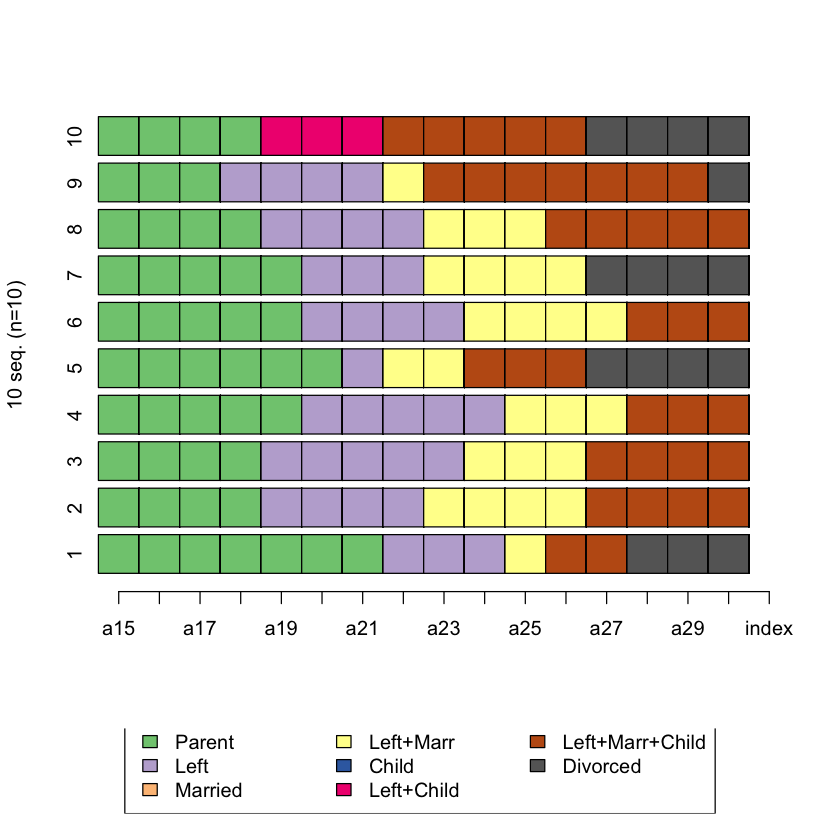

In [75]:
# BEGIN SOLUTION
df <- as.tibble(seqindic(biofam.seq, indic=c("entr","turbn","cplx")))
df$index <- rownames(seqindic(biofam.seq, indic=c("entr","turbn","cplx")))
top10 <- df %>% arrange(desc(Entr)) %>% head(10)
top10

biofam.seq$index <- rownames(biofam.seq)
seqiplot(biofam.seq %>% filter(index %in% top10$index))
# END SOLUTION

### Q.11 What is the average time spent in each state?

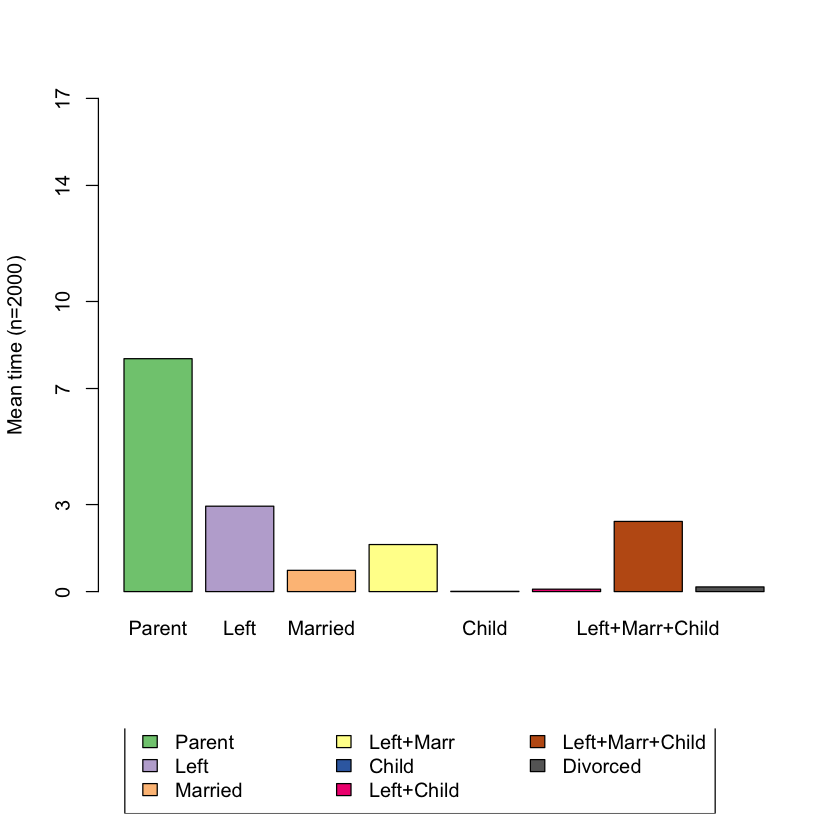

In [76]:
# BEGIN SOLUTION
seqmtplot(biofam.seq)
# END SOLUTION